In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import ODR, Model, RealData, polynomial

[0.00210371 0.00315058 0.67625744 1.         1.         1.        ]


0.01429964665250099

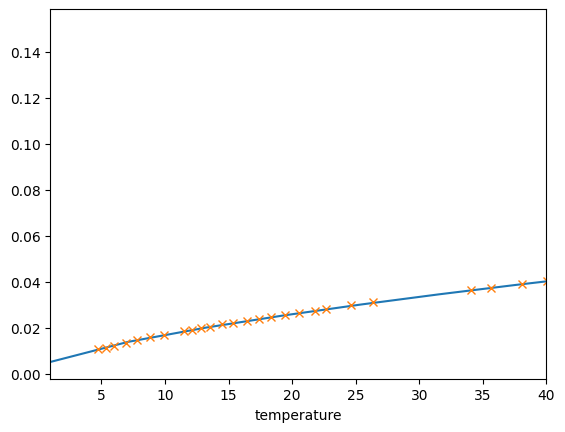

In [29]:
def fitting_function(p, x):
    a, b, c, d, e, f = p
    return a + b * x + c * x**2 + d * x**3 + e * x**4 + f * x**5


def fitting_function(p, x):
    a, b, c, d, e, f = p
    return a + b * x ** (c)


raw_data = pd.read_csv("thermal-conductivity-helium.csv", index_col="temperature")[
    "thermal_conductivity"
]
real_data = RealData(x=raw_data.index, y=raw_data)
model = Model(fitting_function)
fit = ODR(model=model, data=real_data, beta0=[1.0] * 6).run()

xs = np.linspace(1, 300)
ys = fitting_function(fit.beta, xs)
plt.plot(xs, ys)
raw_data.plot(marker="x", lw=0)
plt.xlim(1, 40)
print(fit.beta)
fitting_function(fit.beta, 7.4)